### Annual Global Surface Temperature Visualization
#### Original : https://www.nytimes.com/interactive/2018/01/18/climate/hottest-year-2017.html

In [1]:
library(ggplot2)
library(ggrepel)
library(repr)
library(extrafont)
options(repr.plot.width = 8, repr.plot.height = 5)
options(warn = 0)


Registering fonts with R


In [7]:
# Import fonts for ggplot
font_import()
fonts()

In [3]:
df <- read.csv('GLB.Ts+dSST.csv', stringsAsFactors = F, skip = 1,)

In [4]:
head(df)

Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J.D,D.N,DJF,MAM,JJA,SON
1880,-0.29,-0.18,-0.11,-0.19,-0.11,-0.23,-0.21,-0.09,-0.16,-0.23,-0.20,-0.23,-0.19,***,***,-0.14,-0.18,-0.20
1881,-0.15,-0.17,0.04,0.04,0.02,-0.20,-0.06,-0.02,-0.13,-0.20,-0.21,-0.10,-0.10,-.11,-.18,0.03,-0.09,-0.18
1882,0.15,0.15,0.04,-0.18,-0.16,-0.26,-0.20,-0.05,-0.10,-0.24,-0.16,-0.24,-0.10,-.09,.06,-0.10,-0.17,-0.17
1883,-0.31,-0.39,-0.13,-0.17,-0.20,-0.12,-0.08,-0.15,-0.20,-0.14,-0.22,-0.16,-0.19,-.20,-.31,-0.16,-0.12,-0.19
1884,-0.15,-0.08,-0.37,-0.42,-0.36,-0.40,-0.34,-0.26,-0.27,-0.24,-0.30,-0.28,-0.29,-.28,-.13,-0.39,-0.34,-0.27
1885,-0.58,-0.30,-0.25,-0.42,-0.42,-0.44,-0.35,-0.31,-0.23,-0.19,-0.19,-0.05,-0.31,-.33,-.39,-0.36,-0.36,-0.20


In [5]:
# Calculate some important constants
fromYear <- min(df$Year)
toYear <- max(df$Year)
labeledYearsLeft <- c(1904, 1998)
labeledYearsRight <- c(1944, 2014, 2015, 2017) 
bigText1 <- 'Annual Global Surface Temperature,'
bigText2 <- 'Relative to Late 19th Century Average'
smallText1 <- 'HOTTER THAN THE'
smallText2 <- '1880-1899 AVERAGE'

avgTemp <- mean(df$J.D[0:10])
df$J.D.relative = df$J.D - avgTemp

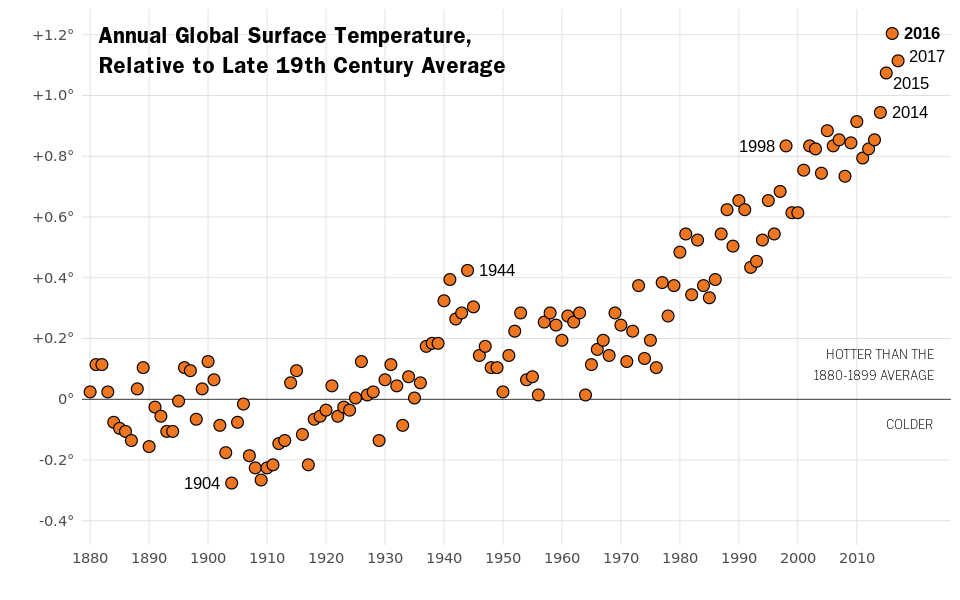

In [9]:
ggplot(df, aes(x = Year, color = Year, y = J.D.relative)) +
    geom_hline(yintercept = 0, size = 0.2) +
    geom_point(
        shape = 21,
        colour = "black",
        fill = "chocolate2",
        size = 3,
        stroke = 0.5
    ) +
    geom_text_repel(
        aes(label = ifelse(Year == 2016, Year, '')),
        color = 'black',
        size = 3.5,
        direction = 'x',
        nudge_x = 5,
        segment.color = NA,
        fontface = "bold"
    ) +
    geom_text_repel(
        aes(label = ifelse(is.element(Year, labeledYearsLeft), Year, '')),
        color = 'black',
        size = 3.5,
        direction = 'x',
        nudge_x = - 5,
        segment.color = NA
    ) +
    geom_text_repel(
        aes(label = ifelse(is.element(Year, labeledYearsRight), Year, '')),
        color = 'black',
        size = 3.5,
        nudge_x = 5,
        vjust = 'center',
        segment.color = NA
    ) +
    xlab('') + ylab('') +
    scale_x_continuous(
        breaks = seq(1880, 2010, by = 10),
        limits = c(fromYear, toYear + 2),
        expand = c(0.01, 0, 0.05, 0)) +
        scale_y_continuous(breaks = seq(- 0.4, 1.2, by = 0.2),
        limits = c(- 0.4, max(df$J.D.relative)),
        labels = c('-0.4°', '-0.2°', '0°', '+0.2°', '+0.4°','+0.6°', '+0.8°', '+1.0°', '+1.2°')
    ) +
    theme_light() +
    theme(
        panel.grid.minor = element_blank(),
        panel.border = element_blank(),
        axis.ticks.x = element_blank(),
        axis.ticks.y = element_blank(),
        text = element_text(family = 'Franklin Gothic ExtraLight')
    ) +
    annotate("text", x = 1913, y = 1.2, size = 4,
             family = 'Franklin Gothic', fontface = 'bold', label = bigText1) +
    annotate("text", x = 1916, y = 1.1, size = 4,
             family = 'Franklin Gothic',fontface = 'bold', label = bigText2) +
    annotate("text", x = 2014, y = 0.15, size = 2.5, 
             family = 'Libre Franklin ExtraLight',fontface = 'plain', label = smallText1) +
    annotate("text", x = 2013, y = 0.08, size = 2.5, 
             family = 'Libre Franklin ExtraLight',fontface = 'plain', label = smallText2) +
    annotate("text", x = 2019, y = - 0.08, size = 2.5, 
             family = 'Libre Franklin ExtraLight',fontface = 'plain', label = 'COLDER')

